In [74]:
import pandas as pd
import os
import numpy as np
import seaborn as sns

In [2]:
#Reading csv file 1
labels=pd.read_csv('secom_labels.data',header=None,sep=' ',names=['status','timestamp'])

In [3]:
#Generate an empty list to put column names in
column_list=[]

In [4]:
#Naming columns 0-590
for x in range(591):
    column_list.append(f'col_{x}')

In [5]:
#Remove the first column name as it starts with 0
column_list.remove('col_0')

In [6]:
#Reading csv file 2
data=pd.read_csv('secom.data',header=None,sep=' ',names=column_list)

In [8]:
#Data file has 590 columns and 1567 rows
print(data.shape)
data.head()

(1567, 590)


,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,...,col_581,col_582,col_583,col_584,col_585,col_586,col_587,col_588,col_589,col_590
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [134]:
stdhist=data.describe().T[['std','mean']]
stdhist['corr_coef']=abs(stdhist['std']/stdhist['mean'])
stdhist=stdhist.sort_values('corr_coef',ascending=False).reset_index().fillna(0)
stdhist['CUMULATIVE_PCT']=stdhist['corr_coef'].cumsum()/stdhist['corr_coef'].sum()*100
#stdhist=stdhist.head(50)
stdhist.to_clipboard()
#sns.histplot(data=stdhist,bins=[0,50,100,200,300,400])

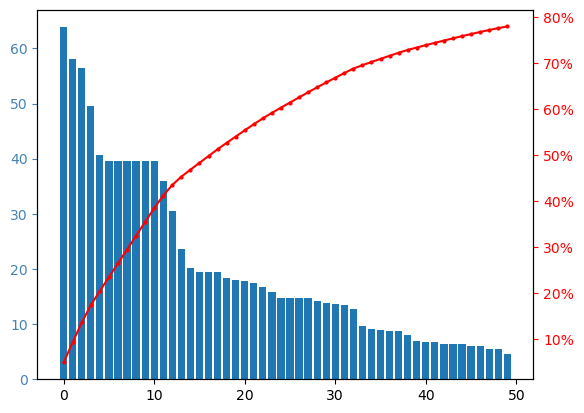

In [129]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(stdhist.index, stdhist['corr_coef'])

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(stdhist.index, stdhist['CUMULATIVE_PCT'], color=color2, marker=".", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

#display Pareto chart
plt.show()

### This section will contain calculations BEFORE the WOE and IV procedures to comply with the requirements

In [16]:
#Generate base dataframe
df=data.merge(labels,left_index=True,right_index=True)
df.head()

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,...,col_583,col_584,col_585,col_586,col_587,col_588,col_589,col_590,status,timestamp
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,19/07/2008 11:55:00
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1,19/07/2008 12:32:00
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,19/07/2008 13:17:00
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 14:43:00
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 15:22:00


In [18]:
#Check for duplicate rows (there are 0)
df.duplicated().sum()

0

In [112]:
#Zero volatility columns are those with 0 or near 0 mean and std
df.describe().T.sort_values('std')

,count,mean,std,min,25%,50%,75%,max
col_328,1563.0,0.000000,0.000000,0.0,0.0000,0.0000,0.0000,0.0000
col_374,1561.0,0.000000,0.000000,0.0,0.0000,0.0000,0.0000,0.0000
col_373,1561.0,0.000000,0.000000,0.0,0.0000,0.0000,0.0000,0.0000
col_372,1561.0,0.000000,0.000000,0.0,0.0000,0.0000,0.0000,0.0000
col_371,1561.0,0.000000,0.000000,0.0,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...
col_297,1565.0,1879.228369,1975.111365,0.0,603.0329,1202.4121,2341.2887,15559.9525
col_25,1565.0,-298.598136,2902.690117,-14804.5,-1476.0000,-78.7500,1377.2500,14106.0000
col_298,1565.0,2342.826978,3226.924298,0.0,210.9366,820.0988,3190.6164,18520.4683
col_162,1565.0,4066.850479,4239.245058,0.0,1321.0000,2614.0000,5034.0000,37943.0000


In [22]:
#Missing values
df.isna().sum().sort_values(ascending=False)

col_158      1429
col_293      1429
col_294      1429
col_159      1429
col_493      1341
             ... 
col_121         0
col_157         0
col_496         0
col_495         0
timestamp       0
Length: 592, dtype: int64

In [24]:
#Outliers

<Axes: >

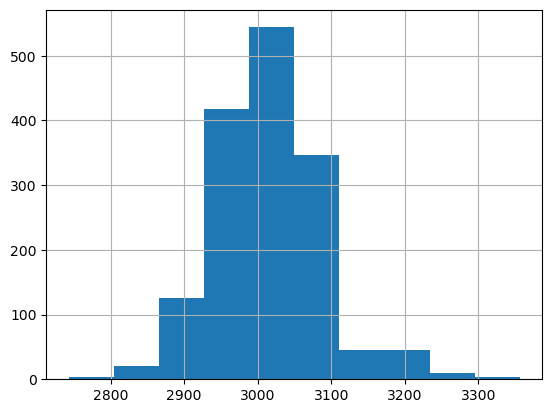

In [158]:
df['col_1'].hist()

In [124]:
#Correlation
corrs=df[column_list].fillna(0).corr()
#.to_clipboard()

In [15]:
df_aux=corrs[['col_1']].rename(columns={'col_1':'corr'})
df_aux['col_name']='col_1'
df_aux

,corr,col_name
col_1,1.000000,col_1
col_2,-0.047782,col_1
col_3,0.007590,col_1
col_4,0.009448,col_1
col_5,-0.000915,col_1
...,...,...
col_586,0.019522,col_1
col_587,0.044745,col_1
col_588,0.005233,col_1
col_589,0.003918,col_1


In [16]:
for n in range(2,590):
    df_next=corrs[[f'col_{n}']].iloc[n:].rename(columns={f'col_{n}':'corr'})
    df_next['col_name']=f'col_{n}'
    df_aux=pd.concat([df_aux,df_next])

In [17]:
descr=df[column_list].describe().T
descr['z-value']=abs(descr['mean']-descr['std'])
descr=descr[['min','max','z-value']]

In [18]:
df_aux.merge(descr,right_index=True,left_index=True).round(3).to_clipboard()

In [72]:
na_aux=df.isna().sum().sort_values(ascending=False)

In [74]:
na_aux=pd.DataFrame(na_aux,columns=['NA_COUNT'])

In [76]:
na_aux['CUMULATIVE_PCT']=na_aux['NA_COUNT'].cumsum()/na_aux['NA_COUNT'].sum()*100

In [84]:
na_aux=na_aux.head(50)
na_aux.reset_index(drop=True,inplace=True)

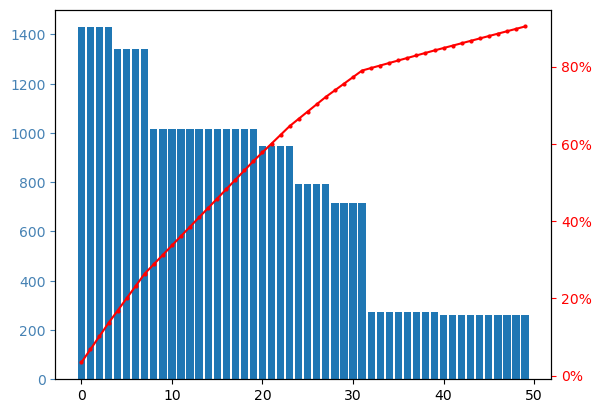

In [54]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(na_aux.index, na_aux['NA_COUNT'])

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(na_aux.index, na_aux['CUMULATIVE_PCT'], color=color2, marker=".", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

#display Pareto chart
plt.show()

#### WOE and IV

In [20]:
#Separate columns into bins
for col in data.columns:
    data[col]=pd.cut(data[col],bins=5).astype(str)

In [21]:
#The secom.names file indicates that both .data files have the same order, therefore we can merge using the index
df=data.merge(labels,left_index=True,right_index=True)

In [22]:
#Dataframe after separating bins and merging with labels file
df

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,...,col_583,col_584,col_585,col_586,col_587,col_588,col_589,col_590,status,timestamp
0,"(2988.484, 3111.106]","(2433.826, 2571.364]","(2162.503, 2213.424]","(743.008, 1486.017]","(-0.432, 223.453]","(99.98, 100.02]","(91.555, 100.98]","(0.103, 0.129]","(1.47, 1.563]","(-0.00208, 0.0236]",...,"(0.497, 0.503]","(0.00553, 0.1]","(0.0016, 0.0223]","(1.099, 20.819]",nan,nan,nan,nan,-1,19/07/2008 11:55:00
1,"(2988.484, 3111.106]","(2433.826, 2571.364]","(2213.424, 2264.345]","(743.008, 1486.017]","(-0.432, 223.453]","(99.98, 100.02]","(100.98, 110.404]","(0.103, 0.129]","(1.47, 1.563]","(-0.00208, 0.0236]",...,"(0.497, 0.503]","(0.00553, 0.1]","(0.0016, 0.0223]","(1.099, 20.819]","(0.00704, 0.031]","(0.0185, 0.0339]","(0.000972, 0.00652]","(147.461, 294.922]",-1,19/07/2008 12:32:00
2,"(2865.862, 2988.484]","(2433.826, 2571.364]","(2162.503, 2213.424]","(1486.017, 2229.025]","(-0.432, 223.453]","(99.98, 100.02]","(91.555, 100.98]","(0.103, 0.129]","(1.377, 1.47]","(-0.00208, 0.0236]",...,"(0.491, 0.497]","(0.00553, 0.1]","(0.0016, 0.0223]","(1.099, 20.819]","(0.0549, 0.0789]","(0.0339, 0.0492]","(0.012, 0.0176]","(-0.737, 147.461]",1,19/07/2008 13:17:00
3,"(2988.484, 3111.106]","(2433.826, 2571.364]","(2162.503, 2213.424]","(743.008, 1486.017]","(-0.432, 223.453]","(99.98, 100.02]","(100.98, 110.404]","(0.103, 0.129]","(1.47, 1.563]","(-0.0277, -0.00208]",...,"(0.497, 0.503]","(0.00553, 0.1]","(0.0016, 0.0223]","(1.099, 20.819]","(0.00704, 0.031]","(0.00312, 0.0185]","(0.000972, 0.00652]","(-0.737, 147.461]",-1,19/07/2008 14:43:00
4,"(2988.484, 3111.106]","(2433.826, 2571.364]","(2213.424, 2264.345]","(743.008, 1486.017]","(-0.432, 223.453]","(99.98, 100.02]","(91.555, 100.98]","(0.103, 0.129]","(1.47, 1.563]","(-0.0277, -0.00208]",...,"(0.478, 0.484]","(0.382, 0.477]","(0.0839, 0.104]","(79.682, 99.303]","(0.00704, 0.031]","(0.00312, 0.0185]","(0.000972, 0.00652]","(-0.737, 147.461]",-1,19/07/2008 15:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,"(2865.862, 2988.484]","(2433.826, 2571.364]","(2162.503, 2213.424]","(2972.033, 3715.042]","(-0.432, 223.453]","(99.98, 100.02]","(82.084, 91.555]","(0.103, 0.129]","(1.284, 1.377]","(-0.0277, -0.00208]",...,"(0.497, 0.503]","(0.00553, 0.1]","(0.0016, 0.0223]","(1.099, 20.819]","(-0.017, 0.00704]","(0.00312, 0.0185]","(0.000972, 0.00652]","(147.461, 294.922]",-1,16/10/2008 15:13:00
1563,"(2988.484, 3111.106]","(2433.826, 2571.364]","(2162.503, 2213.424]","(743.008, 1486.017]","(-0.432, 223.453]","(99.98, 100.02]","(91.555, 100.98]","(0.103, 0.129]","(1.377, 1.47]","(-0.0277, -0.00208]",...,"(0.497, 0.503]","(0.00553, 0.1]","(0.0016, 0.0223]","(1.099, 20.819]","(-0.017, 0.00704]","(0.00312, 0.0185]","(0.000972, 0.00652]","(147.461, 294.922]",-1,16/10/2008 20:49:00
1564,"(2865.862, 2988.484]","(2296.288, 2433.826]","(2162.503, 2213.424]","(743.008, 1486.017]","(-0.432, 223.453]","(99.98, 100.02]","(91.555, 100.98]","(0.103, 0.129]",nan,nan,...,"(0.497, 0.503]","(0.00553, 0.1]","(0.0016, 0.0223]","(1.099, 20.819]","(0.00704, 0.031]","(0.00312, 0.0185]","(0.000972, 0.00652]","(-0.737, 147.461]",-1,17/10/2008 05:26:00
1565,"(2865.862, 2988.484]","(2433.826, 2571.364]","(2162.503, 2213.424]","(743.008, 1486.017]","(-0.432, 223.453]","(99.98, 100.02]","(91.555, 100.98]","(0.103, 0.129]","(1.377, 1.47]","(-0.0277, -0.00208]",...,"(0.497, 0.503]","(0.00553, 0.1]","(0.0016, 0.0223]","(1.099, 20.819]","(0.00704, 0.031]","(0.0185, 0.0339]","(0.00652, 0.012]","(-0.737, 147.461]",-1,17/10/2008 06:01:00


In [23]:
#We need to replace -1 with 0 on the target (status) variable in order for the WOE calculations to work
df['status']=df['status'].replace(-1,0)

In [24]:
#Individual Values are calculated by first doing a pivot table of the column to count the events and no events
#next we calculate the percentages and use the formula for Weight of Evidence (WOE) which is ln(p(non event)/p(event))
#finally we calculate the iv with the formula (p(non event)-p(event))*WOE
#When we sum the IV for all bins of a column we get the total IV for a given column which then we can use to 
#choose the variables which provide the most amount of information
def IV(df, var, tgt):
    aux=df[[var,tgt]].groupby(var).agg(['count', 'sum']).droplevel(0,axis=1)
    aux.rename(columns={'sum':'evento'},inplace=True)
    aux['no_evento'] = aux['count'] - aux['evento']
    aux['%evento'] = aux['evento'] / aux['evento'].sum()
    aux['%no_evento'] = aux['no_evento'] / aux['no_evento'].sum()
    aux['WOE'] = np.log(aux['%no_evento'] / aux['%evento']).replace([np.inf,np.inf*-1],0)
    aux['IV'] = (aux['%no_evento'] - aux['%evento'])*aux['WOE']
    return aux['IV'].sum()

In [25]:
#We execute the aforementioned WOE and IV calculations in a for loop to apply it to all 590 data columns
#The warnings indicate division by zero which is inevitable due to some bins having zero events in them
df_iv = pd.DataFrame(columns=["iv"])
for col in data.columns:
    df_iv.loc[col, "iv"] = IV(df = df, var = col, tgt = 'status')

/Users/hugoam/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/hugoam/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/hugoam/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/hugoam/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/hugoam/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/hugoam/anaconda3/lib/python3.12/site-packages/pandas/core/array

In [26]:
#We sort all IV's from greatest to smallest and use this to do feature selection
df_iv.sort_values('iv',ascending=False)

,iv
col_60,0.408476
col_65,0.319479
col_130,0.233547
col_29,0.19356
col_511,0.188719
...,...
col_253,0.0
col_323,0.0
col_496,0.0
col_362,0.0
